# Analyse des statistiques des Pokémons

Ce projet vise à explorer les statistiques de base des Pokémons afin de répondre à la problématique suivante :

**Y a-t-il une différence de stat notable entre les Pokémons qui ont une évolution et ceux qui n'en ont pas, de manière à optimiser la sélection de Pokémon pour un rush jusqu'à la league Pokemon ?**

Pour y répondre, nous allons :
- Distinguer les Pokémons légendaires/fabuleux des autres, car ils ont un profil statistique bien plus élevé.
- Normaliser les données en uniformisant les formes alternatives en leur forme générale ou en les supprimant. Cela permet de ne pas être faussé sur ces Pokémons étant donné que notre sujet est le rush d'un jeux Pokémons.
- Séparer les Pokémons non légendaires selon leur nombre d’évolutions (aucune, une ou deux), les évolutions étant des cas exceptionnels chez les Pokémons légendaires, on considère que tous les Pokémons légendaires n'évoluent pas.
- Comparer les totaux de statistiques de base entre les catégories qui évoluent et celles qui n'évoluent pas, à travers divers graphiques (nuages de points, barplots, violins plots, etc.).

L’analyse visuelle et statistique permettra de mieux comprendre l’impact de l’évolution sur la puissance d’un Pokémon.

Nos réponses à cette question se baseront sur des données venant d'un dataset trouvé sur internet et qui représente vraiment tous les pokemon présent dans les jeux.     
Pour les commentaires, nous les avons écrit en français tout comme le reste du projet.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

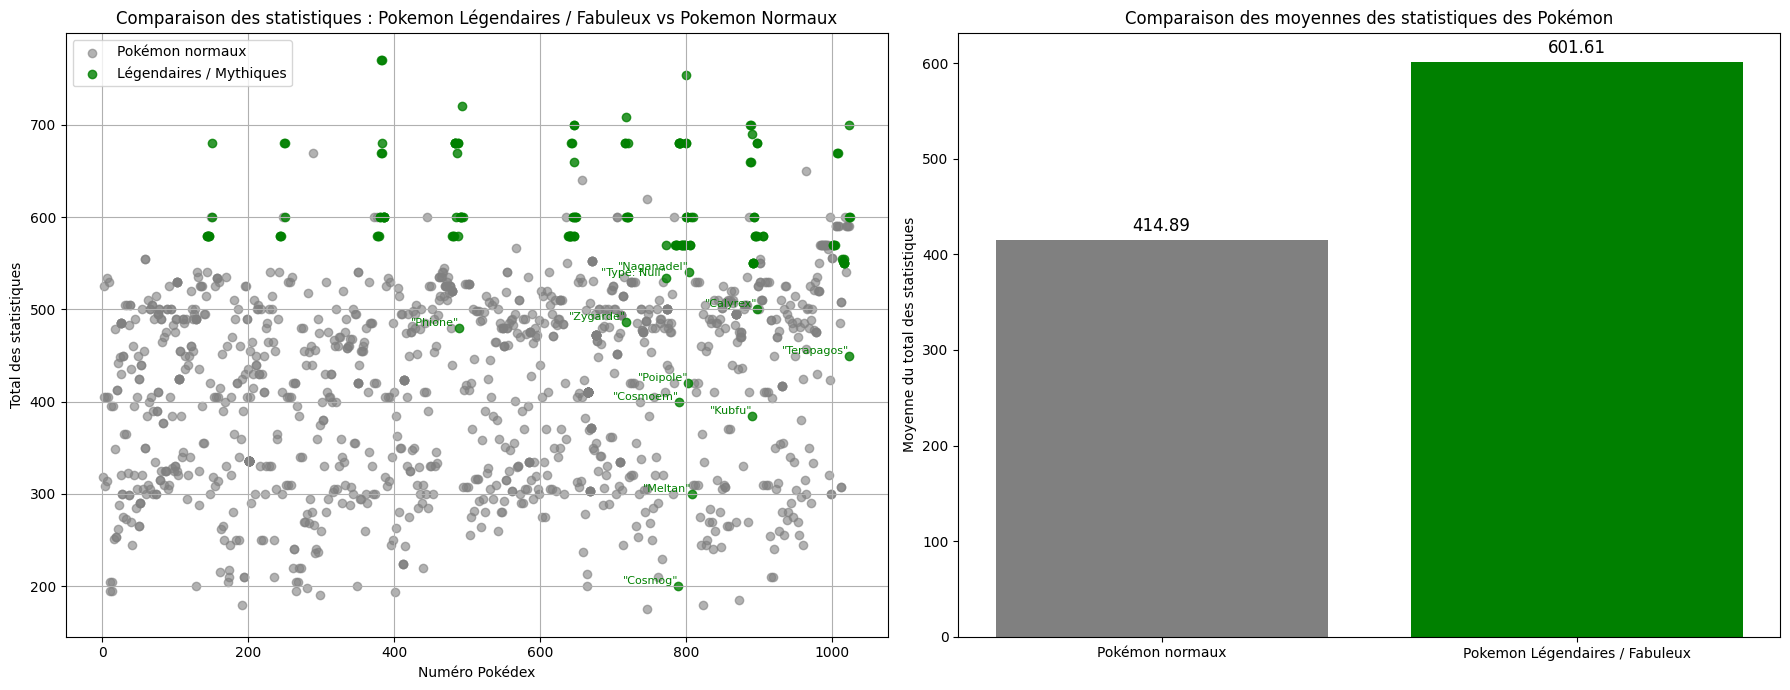

In [ ]:
# Charger les données
file_path = 'Dataset/PokemonDatabase.csv'
df = pd.read_csv(file_path)

# Nettoyage
df = df[~df["Alternate Form Name"].astype(str).str.contains("Mega|Gigantamax|Eternamax", na=False)] # gère les formes
df.loc[df["Pokemon Name"].str.startswith('"Unown'), "Pokemon Name"] = '"Unown"' # gère les Zarbis

# Nettoyage des valeurs de "Legendary Type"
df["Legendary Type"] = df["Legendary Type"].astype(str).str.replace('"', '').str.strip()

# Définition des Pokemon Légendaires / Fabuleux et Pokemon normaux
legendary_types = ["Legendary", "Mythical", "Sub-Legendary"]
df_legendary_pokemon = df["Legendary Type"].isin(legendary_types)

# Création du scatter plot
fig, ax = plt.subplots(1, 2, figsize=(18, 7))

# Affichage des Pokémon normaux (gris)
ax[0].scatter(df.loc[~df_legendary_pokemon, "Pokedex Number"],
              df.loc[~df_legendary_pokemon, "Base Stat Total"],
              color="gray", label="Pokémon normaux", alpha=0.6)

# Affichage des Pokémon Pokemon Légendaires / Fabuleux (verts)
ax[0].scatter(df.loc[df_legendary_pokemon, "Pokedex Number"],
              df.loc[df_legendary_pokemon, "Base Stat Total"],
              color="green", label="Légendaires / Mythiques", alpha=0.8)

# Affichage des noms des Pokémon dont le "Base Stat Total" est inférieur à 550
for _, row in df[(df["Base Stat Total"] < 550) & df_legendary_pokemon].iterrows():
    ax[0].text(row["Pokedex Number"], row["Base Stat Total"], row["Pokemon Name"],
               fontsize=8, ha='right', va='bottom', color='green')

# Titres et légendes pour le scatter plot
ax[0].set_xlabel("Numéro Pokédex")
ax[0].set_ylabel("Total des statistiques")
ax[0].set_title("Comparaison des statistiques : Pokemon Légendaires / Fabuleux vs Pokemon Normaux")
ax[0].legend()
ax[0].grid(True)

# Calcul des moyennes des stats des Pokémon Pokemon Légendaires / Fabuleux et normaux
mean_legendary = df[df_legendary_pokemon]["Base Stat Total"].mean()
mean_normal = df[~df_legendary_pokemon]["Base Stat Total"].mean()

# Création de l'histogramme des moyennes
bars = ax[1].bar(["Pokémon normaux", "Pokemon Légendaires / Fabuleux"], [mean_normal, mean_legendary], color=['gray', 'green'])

# Affichage des valeurs sur l'histogramme
for bar in bars:
    yval = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width() / 2, yval + 5, round(yval, 2), ha='center', va='bottom', fontsize=12)

# Ajout des titres et légendes pour l'histogramme
ax[1].set_ylabel("Moyenne du total des statistiques")
ax[1].set_title("Comparaison des moyennes des statistiques des Pokémon")

# Affichage du graphique
plt.tight_layout()
plt.show()


### Intérêt du graphique et Analyse ###

Ces graphiques ont pour but de montrer s'il existe une différence de statistique totale notable entre les Pokémons légendaires/fabuleux et le reste des Pokémons.

Grâce au nuage de point (graph gauche) il est facile d'observer une segmentation nette à environ 550 pour le total des statistiques, où on remarque que les légendaires sont majoritairement au dessus de ce seuil et le reste des Pokémons majoritairement en dessous.
Seules quelques exceptions de Pokémons non-légendaires/fabuleux dépassent un total de statistiques de 550, ils sont regroupés dans la catégorie des types dragons qui sont les seuls à avoir une réputation d'avoir plus de statistiques que la moyenne globale. Concernant les Pokémons légendaires/fabuleux les exceptions sont des Pokémons partiellement complet (Zygarde 5%) ou des formes qui servent à l'histoire du jeux et donc qui ne sont jouables que lors de leur dernière forme (Cosmog, Cosmoen, Phione, Meltan, Kubfu, terapagos, Vémini), sur le graphique ils ont été mis en lumière pour pouvoir comprendre leur cas unique.   
Ce graphique permet donc de confirmer que les Pokémon légendaires sont globalement bien plus puissants et doivent donc être étudiés à part des Pokemon non-légendaires dans l’analyse.

Le BarPlot (graph droite) permet de visuellement bien voir la supériorité global des Pokémons légendaires/fabuleux sur le reste des Pokémons grâce à la moyenne des statistique de chaque catégorie. Avec 185 points de statistiques en plus pour les Pokémons légendaires/fabuleux soit un équivalent de 145% des stats des Pokémons non légendaires/fabuleux.

Dans l'optique d'un rush, nous devons suivre l'histoire du jeux, très souvent liée à un/plusieurs Pokémon légendaires. Le scénario est toujours le même, peu importe la version : les Pokémons légendaires ne sont obtenables qu'en fin de partie (tout de même avant la league). Nous ne pouvons donc pas simplement en remplir notre équipe dès le début de partie, et nous devons composer avec des Pokémons non-légendaires.

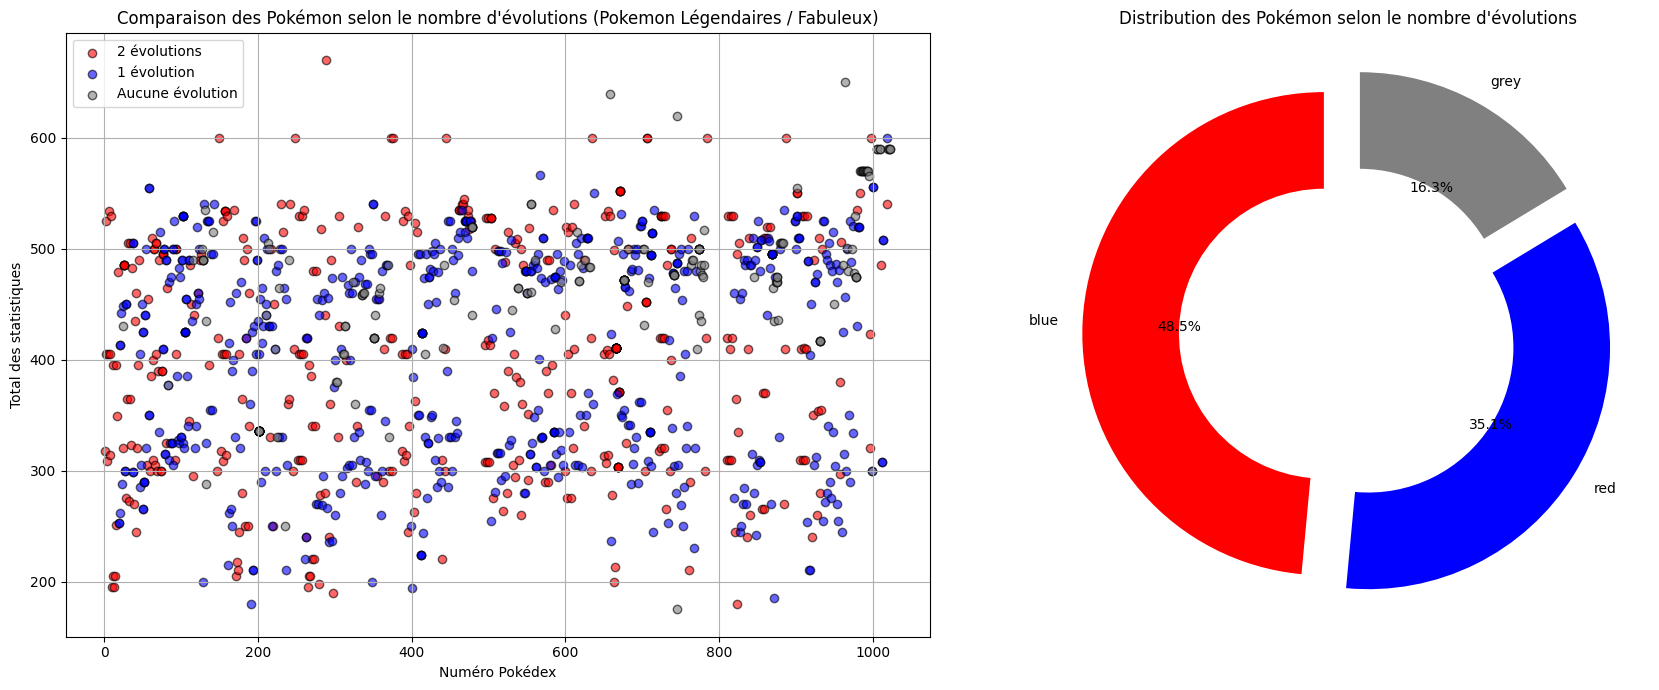

In [5]:
# Exclure les Pokémon Pokemon Légendaires / Fabuleux
df_base_pokemon = df[~df_legendary_pokemon].copy()  # Création d'une copie


# Créer un dictionnaire pour mapper les IDs d'évolution
pokemon_id_dict = dict(zip(df_base_pokemon["Pokemon Id"], df_base_pokemon["Pokemon Name"]))

# Fonction pour trouver la chaîne d'évolution à partir d'un Pokémon donné
def get_evolution_chain(pokemon_id, df):
    chain = [pokemon_id]
    current_pokemon = df_base_pokemon[df_base_pokemon["Pokemon Id"] == pokemon_id]

    # Remonter la chaîne d'évolution en suivant les pré-évolutions
    while not current_pokemon["Pre-Evolution Pokemon Id"].isnull().values[0]:
        pre_evolution_id = current_pokemon["Pre-Evolution Pokemon Id"].values[0]
        chain.append(pre_evolution_id)
        current_pokemon = df_base_pokemon[df_base_pokemon["Pokemon Id"] == pre_evolution_id]

    return chain

# Créer une colonne pour stocker la couleur des points
df_base_pokemon['Color'] = 'grey'  # Initialisation avec 'grey' (aucune évolution)

# Mettre à jour la couleur pour les Pokémon selon la chaîne d'évolutions
for _, row in df_base_pokemon.iterrows():
    chain = get_evolution_chain(row["Pokemon Id"], df_base_pokemon)
    # Si la chaîne contient 3 Pokémon (2 évolutions), colorier en rouge
    if len(chain) == 3:
        df_base_pokemon.loc[df_base_pokemon["Pokemon Id"].isin(chain), 'Color'] = 'red'
    # Si la chaîne contient 2 Pokémon (1 évolution), colorier en bleu
    elif len(chain) == 2:
        df_base_pokemon.loc[df_base_pokemon["Pokemon Id"].isin(chain), 'Color'] = 'blue'

# Affichage du nombre de chaque couleur
color_counts = df_base_pokemon['Color'].value_counts()
#print("Nombre de Pokémon par couleur :")
#print(color_counts)

# Création du graphique
fig, ax = plt.subplots(1, 2, figsize=(18, 7))

# Première partie : Nuage de points
# Affichage des Pokémon avec la couleur de la chaîne d'évolution
scatter_red = ax[0].scatter(df_base_pokemon.loc[df_base_pokemon['Color'] == 'red', "Pokedex Number"],
                            df_base_pokemon.loc[df_base_pokemon['Color'] == 'red', "Base Stat Total"],
                            color='red', label='2 évolutions', alpha=0.6, edgecolors='black')

scatter_blue = ax[0].scatter(df_base_pokemon.loc[df_base_pokemon['Color'] == 'blue', "Pokedex Number"],
                             df_base_pokemon.loc[df_base_pokemon['Color'] == 'blue', "Base Stat Total"],
                             color='blue', label='1 évolution', alpha=0.6, edgecolors='black')

scatter_grey = ax[0].scatter(df_base_pokemon.loc[df_base_pokemon['Color'] == 'grey', "Pokedex Number"],
                              df_base_pokemon.loc[df_base_pokemon['Color'] == 'grey', "Base Stat Total"],
                              color='grey', label='Aucune évolution', alpha=0.6, edgecolors='black')

# Titres et légendes
ax[0].set_xlabel("Numéro Pokédex")
ax[0].set_ylabel("Total des statistiques")
ax[0].set_title("Comparaison des Pokémon selon le nombre d'évolutions (Pokemon Légendaires / Fabuleux)")

# Affichage de la légende
ax[0].legend()
ax[0].grid(True)

# Deuxième partie : Donut Chart
# Création du donut chart
labels = color_counts.index
sizes = color_counts.values
explode = (0.1, 0.1, 0.1)  # Séparation des tranches pour l'effet visuel

ax[1].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['red', 'blue', 'grey'], explode=explode, wedgeprops={'width': 0.4})
ax[1].set_title("Distribution des Pokémon selon le nombre d'évolutions")

# Affichage du graphique
plt.tight_layout()
plt.show()


### Intérêt du graphique et Analyse ###

Ces graphiques montrent la répartition de tous les Pokémons (légendaires compris) en fonction de leur nombre d’évolutions.

- **Nuage de points (gauche)** : On visualise chaque Pokémon selon son numéro de Pokédex et son total de statistiques de base. Les couleurs correspondent au nombre d’évolutions :
  - 🔴 Rouge : Pokémon avec deux évolutions
  - 🔵 Bleu : Pokémon avec une seule évolution
  - ⚫ Gris : Pokémon sans évolution

On observe que plus un Pokémon possède d’évolutions, plus il tend à avoir un total de statistiques élevé. Ceux avec deux évolutions atteignent globalement de meilleurs scores. Là où les Pokémons n'ayant qu'une seule évolution sont plutôt sur un total des statistiques à 500 et 300, et les Pokémons sans évolution sont plus bas en termes de statistiques, sauf pour quelques exceptions.

- **Donut Chart (droite)** : Ce diagramme circulaire donne un aperçu de la distribution des Pokémons selon leur nombre d’évolutions. On voit une majorité de Pokémons ayant deux évolutions, suivis de ceux avec une, et enfin, une minorité qui ceux sans aucune évolution.


La distribution des Pokémons en fonction de leur évolution montre qu'il est plus facile de trouver des Pokémons ayant deux évolutions par rapport aux autres. En effet avec une présence d'un Pokémon sur deux ayant deux évolutions, trouver ce type de Pokémon peut importe le jeux et le moment de la partie où le rush s'effectue est plus facile. Nous aurons alors plus de choix sur quel Pokémon utiliser selon la situation rencontrée dans la partie. Car bien qu'un point fondamental, les statistiques ne sont pas le seul facteur de puissance d'un Pokémon dans un contexte (type et talent).

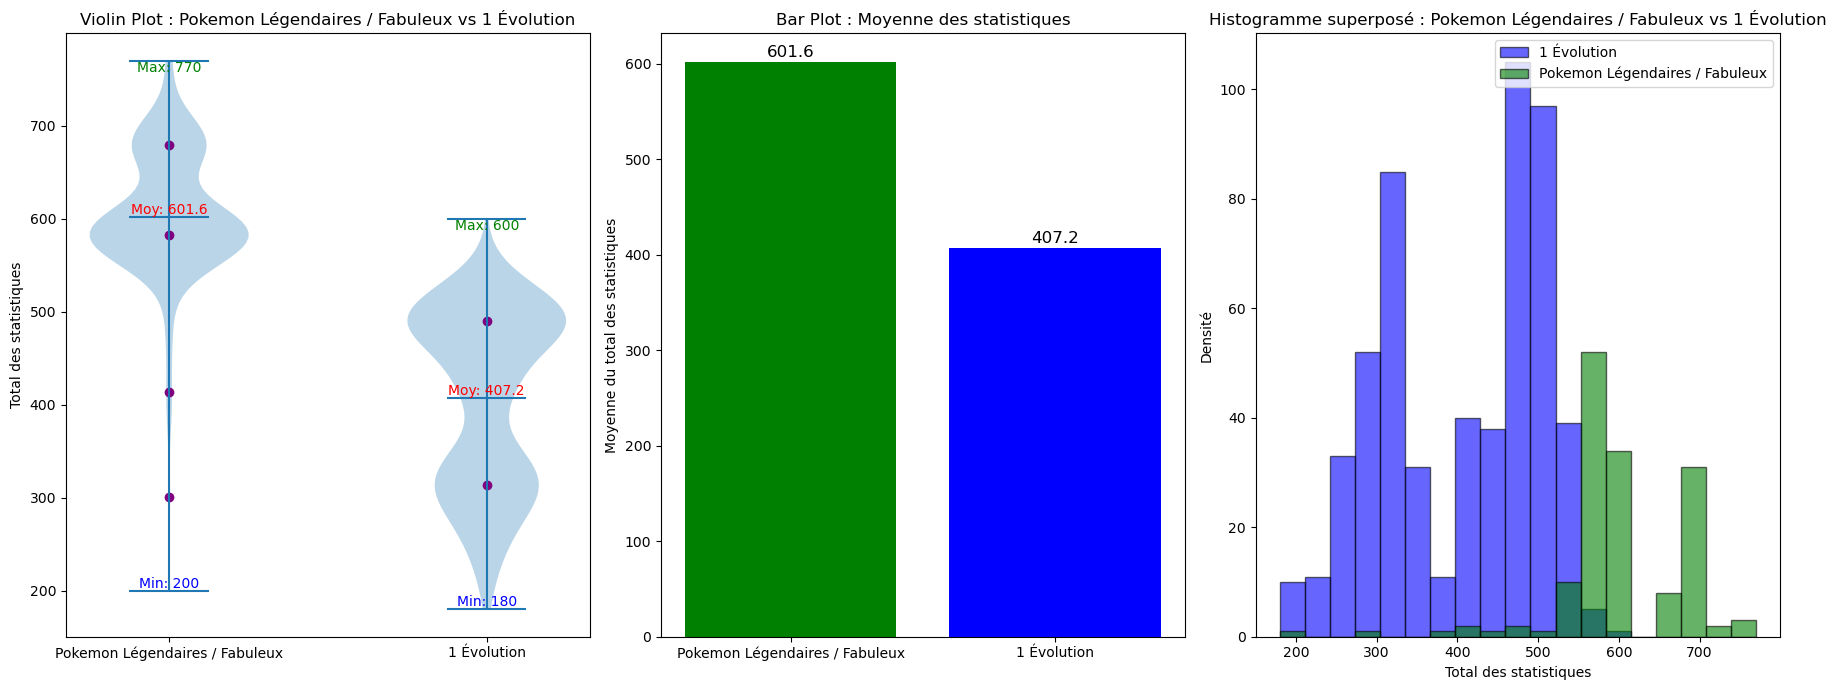

In [34]:
# Filtrer les Pokémon Pokemon Légendaires / Fabuleux et ceux ayant 1 évolution
df_single_evolution = df_base_pokemon[df_base_pokemon['Color'] == 'blue']  # Pokémon avec 1 évolution
df_legendary_pokemon = df[df_legendary_pokemon]  # Fait gaffe à ce que df_legendary_pokemon soit déjà bien filtré

# Extraire les valeurs pour les statistiques de base
stats_single_evolution = df_single_evolution['Base Stat Total'].values
stats_legendary = df_legendary_pokemon['Base Stat Total'].values

# Calcul des statistiques pour affichage
mean_stats = [np.mean(stats_legendary), np.mean(stats_single_evolution)]
min_stats = [np.min(stats_legendary), np.min(stats_single_evolution)]
max_stats = [np.max(stats_legendary), np.max(stats_single_evolution)]

# Fonction pour trouver les pics (modes)
def find_peaks(data):
    kde = gaussian_kde(data)  # Densité de probabilité
    x_vals = np.linspace(min(data), max(data), 1000)
    y_vals = kde(x_vals)

    peak_indices = np.where((y_vals[1:-1] > y_vals[:-2]) & (y_vals[1:-1] > y_vals[2:]))[0] + 1
    peaks = x_vals[peak_indices]

    return peaks

peaks_legendary = find_peaks(stats_legendary)
peaks_single_evolution = find_peaks(stats_single_evolution)

# Création du graphique
fig, ax = plt.subplots(1, 3, figsize=(18, 7))

# 1. Violin Plot avec stats et pics
parts = ax[0].violinplot([stats_legendary, stats_single_evolution], showmeans=True, showextrema=True)

# Ajouter les valeurs min, max et moyennes
for i, (mean, min_val, max_val, peaks) in enumerate(zip(mean_stats, min_stats, max_stats, [peaks_legendary, peaks_single_evolution]), start=1):
    ax[0].text(i, mean, f'Moy: {mean:.1f}', ha='center', va='bottom', fontsize=10, color='red')
    ax[0].text(i, min_val, f'Min: {min_val}', ha='center', va='bottom', fontsize=10, color='blue')
    ax[0].text(i, max_val, f'Max: {max_val}', ha='center', va='top', fontsize=10, color='green')

    # Ajouter les pics (modes)
    for peak in peaks:
        ax[0].scatter(i, peak, color='purple', marker='o', label='Pic' if i == 1 else "")

ax[0].set_xticks([1, 2])
ax[0].set_xticklabels(["Pokemon Légendaires / Fabuleux", "1 Évolution"])
ax[0].set_title("Violin Plot : Pokemon Légendaires / Fabuleux vs 1 Évolution")
ax[0].set_ylabel("Total des statistiques")

# 2. Bar Plot avec affichage des valeurs précises
bars = ax[1].bar(["Pokemon Légendaires / Fabuleux", "1 Évolution"], mean_stats, color=['green', 'blue'])

# Ajouter les valeurs des moyennes sur les barres
for bar, value in zip(bars, mean_stats):
    ax[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, f'{value:.1f}', ha='center', fontsize=12)

ax[1].set_title("Bar Plot : Moyenne des statistiques")
ax[1].set_ylabel("Moyenne du total des statistiques")

# 3. Histogramme superposé
bins = np.linspace(min(min(stats_single_evolution), min(stats_legendary)),
                   max(max(stats_single_evolution), max(stats_legendary)), 20)

ax[2].hist(stats_single_evolution, bins=bins, color='blue', alpha=0.6, label="1 Évolution", edgecolor='black')
ax[2].hist(stats_legendary, bins=bins, color='green', alpha=0.6, label="Pokemon Légendaires / Fabuleux", edgecolor='black')

ax[2].set_title("Histogramme superposé : Pokemon Légendaires / Fabuleux vs 1 Évolution")
ax[2].set_xlabel("Total des statistiques")
ax[2].set_ylabel("Densité")
ax[2].legend()

# Affichage du graphique
plt.tight_layout()
plt.show()


### Intérêt du graphique et Analyse ###

Ces trois graphiques permettent de comparer les statistiques entre les Pokémons légendaires/fabuleux et les Pokémons non légendaires ayant une seule évolution.

- **Violin Plot (gauche)** : Ce graphique illustre la distribution des totaux de statistiques. Les légendaires ont une concentration plus haute, avec une moyenne significativement supérieure. Les pics (modes) sont également visibles, signalant des zones où les totaux de stats sont fréquents : 600 et plus pour les légendaires et 500 et moins pour les Pokémons à une évolution.
- **Bar Plot (centre)** : Ce graphique compare directement les moyennes de statistiques. Les Pokémons légendaires dépassent clairement ceux qui n'ont qu'une seule évolution avec une différence de 194 points.
- **Histogramme (droite)** : Ce graphique montre les distributions. Encore une fois, les Pokémons légendaire sont clairement décalés vers des valeurs plus élevées (550 et plus) par rapport aux Pokémons à une évolution (550 et moins).


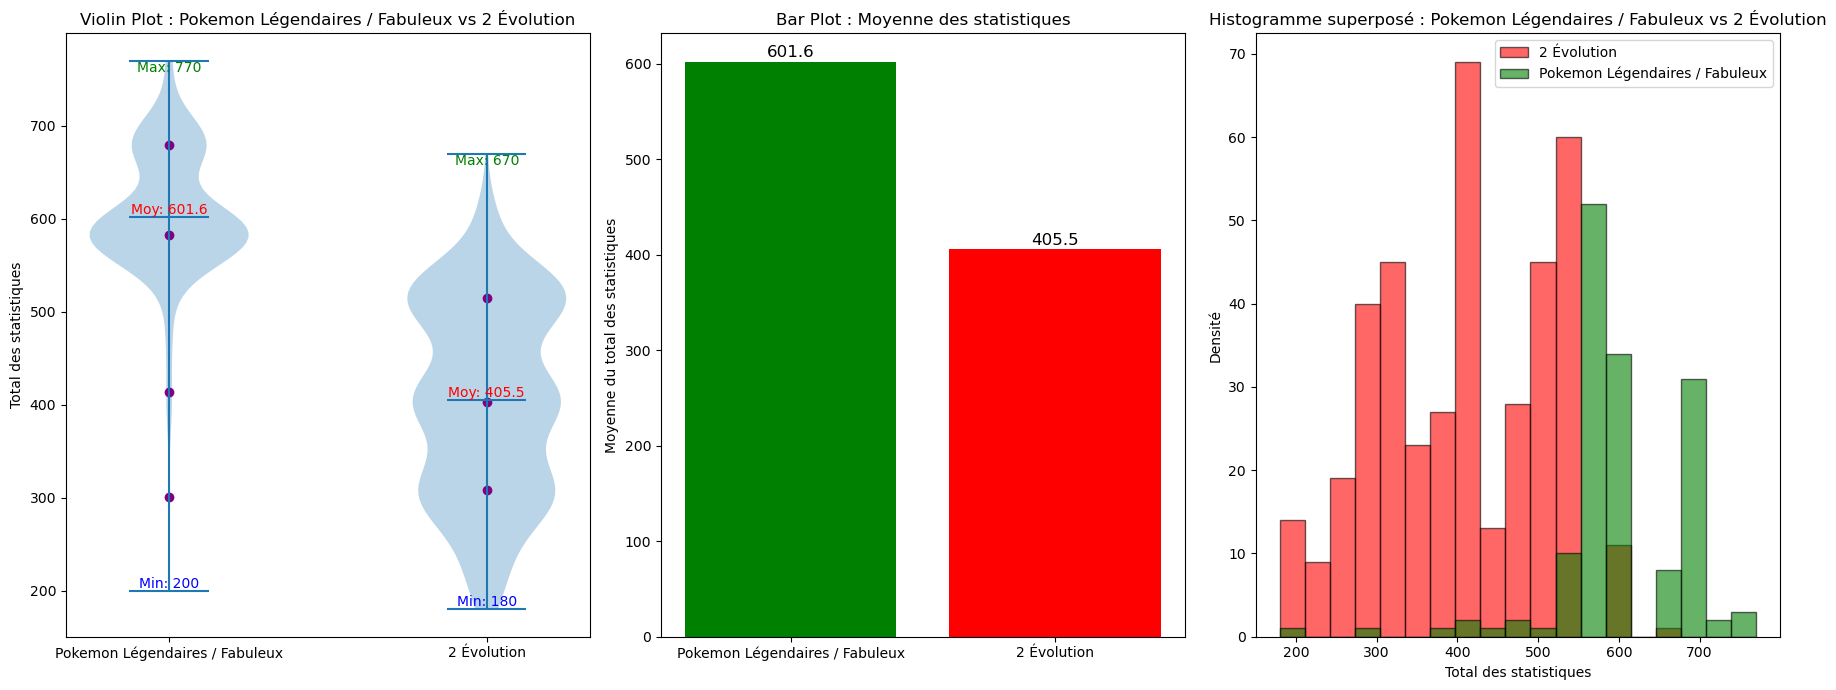

In [35]:

# Filtrer les Pokémon Pokemon Légendaires / Fabuleux et ceux ayant 1 évolution
df_two_evolution = df_base_pokemon[df_base_pokemon['Color'] == 'red']  # Pokémon avec 1 évolution

# Extraire les valeurs pour les statistiques de base
stats_two_evolution = df_two_evolution['Base Stat Total'].values
stats_legendary = df_legendary_pokemon['Base Stat Total'].values

# Calcul des statistiques pour affichage
mean_stats = [np.mean(stats_legendary), np.mean(stats_two_evolution)]
min_stats = [np.min(stats_legendary), np.min(stats_two_evolution)]
max_stats = [np.max(stats_legendary), np.max(stats_two_evolution)]


# Fonction pour trouver les pics (modes)
def find_peaks(data):
    kde = gaussian_kde(data)  # Densité de probabilité
    x_vals = np.linspace(min(data), max(data), 1000)
    y_vals = kde(x_vals)

    peak_indices = np.where((y_vals[1:-1] > y_vals[:-2]) & (y_vals[1:-1] > y_vals[2:]))[0] + 1
    peaks = x_vals[peak_indices]

    return peaks


peaks_legendary = find_peaks(stats_legendary)
peaks_two_evolution = find_peaks(stats_two_evolution)

# Création du graphique
fig, ax = plt.subplots(1, 3, figsize=(18, 7))

# 1. Violin Plot avec stats et pics
parts = ax[0].violinplot([stats_legendary, stats_two_evolution], showmeans=True, showextrema=True)

# Ajouter les valeurs min, max et moyennes
for i, (mean, min_val, max_val, peaks) in enumerate(
        zip(mean_stats, min_stats, max_stats, [peaks_legendary, peaks_two_evolution]), start=1):
    ax[0].text(i, mean, f'Moy: {mean:.1f}', ha='center', va='bottom', fontsize=10, color='red')
    ax[0].text(i, min_val, f'Min: {min_val}', ha='center', va='bottom', fontsize=10, color='blue')
    ax[0].text(i, max_val, f'Max: {max_val}', ha='center', va='top', fontsize=10, color='green')

    # Ajouter les pics (modes)
    for peak in peaks:
        ax[0].scatter(i, peak, color='purple', marker='o', label='Pic' if i == 1 else "")

ax[0].set_xticks([1, 2])
ax[0].set_xticklabels(["Pokemon Légendaires / Fabuleux", "2 Évolution"])
ax[0].set_title("Violin Plot : Pokemon Légendaires / Fabuleux vs 2 Évolution")
ax[0].set_ylabel("Total des statistiques")

# 2. Bar Plot avec affichage des valeurs précises
bars = ax[1].bar(["Pokemon Légendaires / Fabuleux", "2 Évolution"], mean_stats, color=['green', 'red'])

# Ajouter les valeurs des moyennes sur les barres
for bar, value in zip(bars, mean_stats):
    ax[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{value:.1f}', ha='center', fontsize=12)

ax[1].set_title("Bar Plot : Moyenne des statistiques")
ax[1].set_ylabel("Moyenne du total des statistiques")

# 3. Histogramme superposé
bins = np.linspace(min(min(stats_two_evolution), min(stats_legendary)),
                   max(max(stats_two_evolution), max(stats_legendary)), 20)

ax[2].hist(stats_two_evolution, bins=bins, color='red', alpha=0.6, label="2 Évolution", edgecolor='black')
ax[2].hist(stats_legendary, bins=bins, color='green', alpha=0.6, label="Pokemon Légendaires / Fabuleux", edgecolor='black')

ax[2].set_title("Histogramme superposé : Pokemon Légendaires / Fabuleux vs 2 Évolution")
ax[2].set_xlabel("Total des statistiques")
ax[2].set_ylabel("Densité")
ax[2].legend()

# Affichage du graphique
plt.tight_layout()
plt.show()

### Intérêt du graphique et Analyse ###

Même logique que précédemment, mais ici on compare les Pokémons légendaires/fabuleux aux Pokémons avec **deux évolutions**.

- **Violin Plot** : Bien que les Pokémons avec deux évolutions aient une bonne répartition, leur moyenne est presque la même que les Pokémons à une évolution, ils restent donc bien en dessous des légendaires.
- **Bar Plot** : La différence de moyenne reste identique à celle des Pokémons à une seule évolution, avec presque la même différence de stat énorme de 196.
- **Histogramme** : On remarque que certains Pokémon avec deux évolutions atteignent le niveau de certains légendaires, mais ils sont rares et le résultat reste le même que celui des Pokemon à une seule évolution : Pokémon légendaire à 550 et plus et Pokémon à 2 évolutions à 550 et moins points de statistiques.


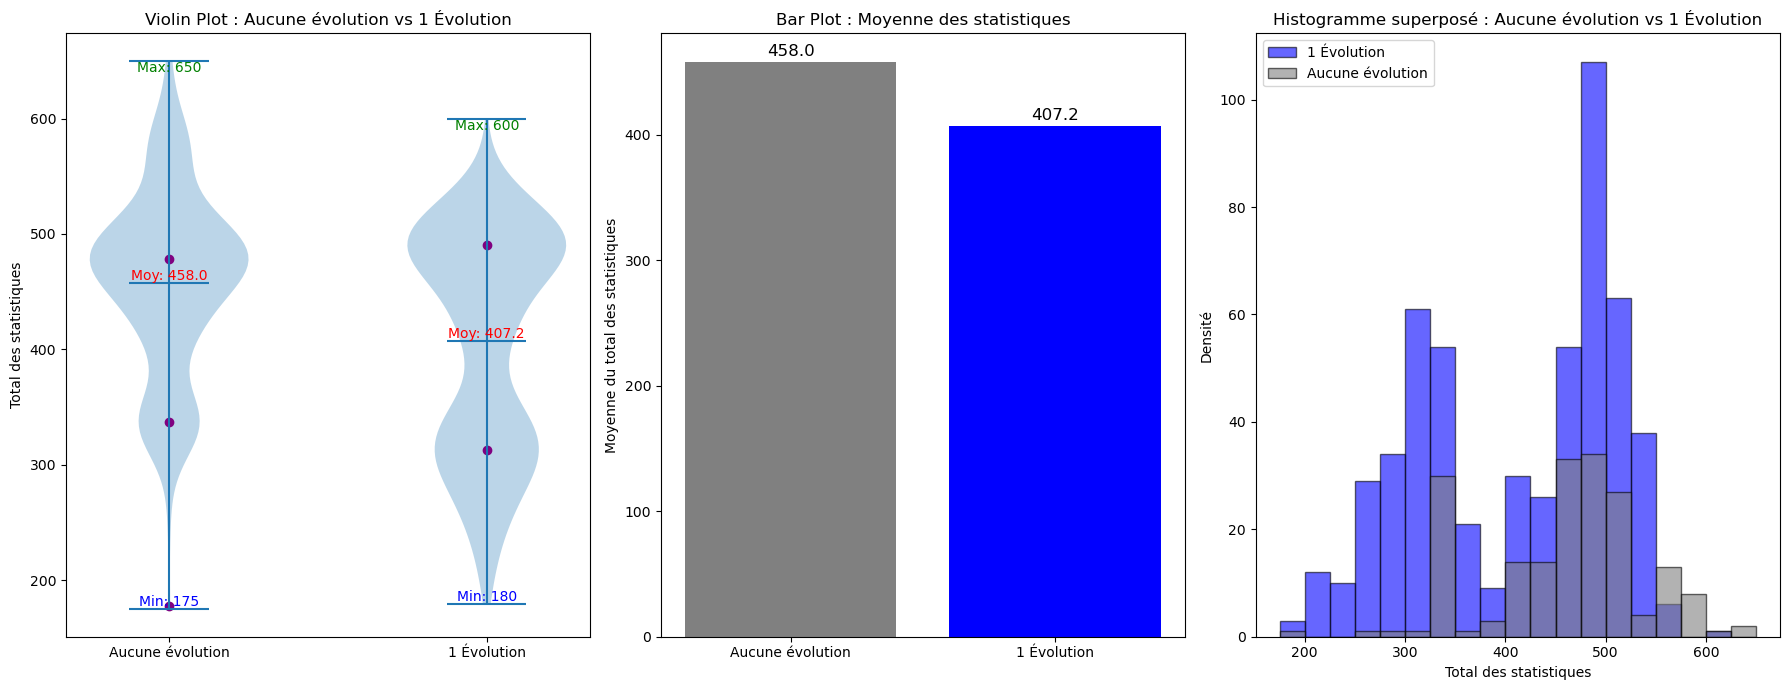

In [36]:
# Filtrer les Pokémon avec Aucune évolution et ceux ayant 1 évolution
df_none_evolution = df_base_pokemon[df_base_pokemon['Color'] == 'grey']

# Extraire les valeurs pour les statistiques de base
stats_none_evolution = df_none_evolution['Base Stat Total'].values

# Calcul des statistiques pour affichage
mean_stats = [np.mean(stats_none_evolution), np.mean(stats_single_evolution)]
min_stats = [np.min(stats_none_evolution), np.min(stats_single_evolution)]
max_stats = [np.max(stats_none_evolution), np.max(stats_single_evolution)]

# Fonction pour trouver les pics (modes)
def find_peaks(data):
    kde = gaussian_kde(data)  # Densité de probabilité
    x_vals = np.linspace(min(data), max(data), 1000)
    y_vals = kde(x_vals)

    peak_indices = np.where((y_vals[1:-1] > y_vals[:-2]) & (y_vals[1:-1] > y_vals[2:]))[0] + 1
    peaks = x_vals[peak_indices]

    return peaks

peaks_none_evolution = find_peaks(stats_none_evolution)

# Création du graphique
fig, ax = plt.subplots(1, 3, figsize=(18, 7))

# 1. Violin Plot avec stats et pics
parts = ax[0].violinplot([stats_none_evolution, stats_single_evolution], showmeans=True, showextrema=True)

# Ajouter les valeurs min, max et moyennes
for i, (mean, min_val, max_val, peaks) in enumerate(zip(mean_stats, min_stats, max_stats, [peaks_none_evolution, peaks_single_evolution]), start=1):
    ax[0].text(i, mean, f'Moy: {mean:.1f}', ha='center', va='bottom', fontsize=10, color='red')
    ax[0].text(i, min_val, f'Min: {min_val}', ha='center', va='bottom', fontsize=10, color='blue')
    ax[0].text(i, max_val, f'Max: {max_val}', ha='center', va='top', fontsize=10, color='green')

    # Ajouter les pics (modes)
    for peak in peaks:
        ax[0].scatter(i, peak, color='purple', marker='o', label='Pic' if i == 1 else "")

ax[0].set_xticks([1, 2])
ax[0].set_xticklabels(["Aucune évolution", "1 Évolution"])
ax[0].set_title("Violin Plot : Aucune évolution vs 1 Évolution")
ax[0].set_ylabel("Total des statistiques")

# 2. Bar Plot avec affichage des valeurs précises
bars = ax[1].bar(["Aucune évolution", "1 Évolution"], mean_stats, color=['grey', 'blue'])

# Ajouter les valeurs des moyenes sur les barres
for bar, value in zip(bars, mean_stats):
    ax[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, f'{value:.1f}', ha='center', fontsize=12)

ax[1].set_title("Bar Plot : Moyenne des statistiques")
ax[1].set_ylabel("Moyenne du total des statistiques")

# 3. Histogramme superposé
bins = np.linspace(min(min(stats_single_evolution), min(stats_none_evolution)),
                   max(max(stats_single_evolution), max(stats_none_evolution)), 20)

ax[2].hist(stats_single_evolution, bins=bins, color='blue', alpha=0.6, label="1 Évolution", edgecolor='black')
ax[2].hist(stats_none_evolution, bins=bins, color='grey', alpha=0.6, label="Aucune évolution", edgecolor='black')

ax[2].set_title("Histogramme superposé : Aucune évolution vs 1 Évolution")
ax[2].set_xlabel("Total des statistiques")
ax[2].set_ylabel("Densité")
ax[2].legend()

# Affichage du graphique
plt.tight_layout()
plt.show()


### Intérêt du graphique et Analyse ###

Ces graphiques comparent uniquement les Pokémons non légendaires, entre ceux **sans évolution** et ceux **ayant une seule**.

- **Violin Plot** : On voit une légère supériorité des Pokémons sans évolution. Les moyennes et les extrêmes indiquent que ceux qui évoluent ont tendance à être plus faibles. 
- **Bar Plot** : Les moyennes des statistiques montrent que les Pokémons sans évolution dépassent les Pokémons avec une seule évolution, avec une solide différence de 51 points.
- **Histogramme** : Les Pokémons avec 1 évolution ont en moyenne de meilleures statistiques de base que ceux sans aucune évolution. Ils sont non seulement plus nombreux dans les tranches élevées, mais ont aussi un pic significatif autour de 500 points. Quelques Pokémons à une évolution dépassent 500 points mais ils sont majoritairement entre 300 et 450 points.


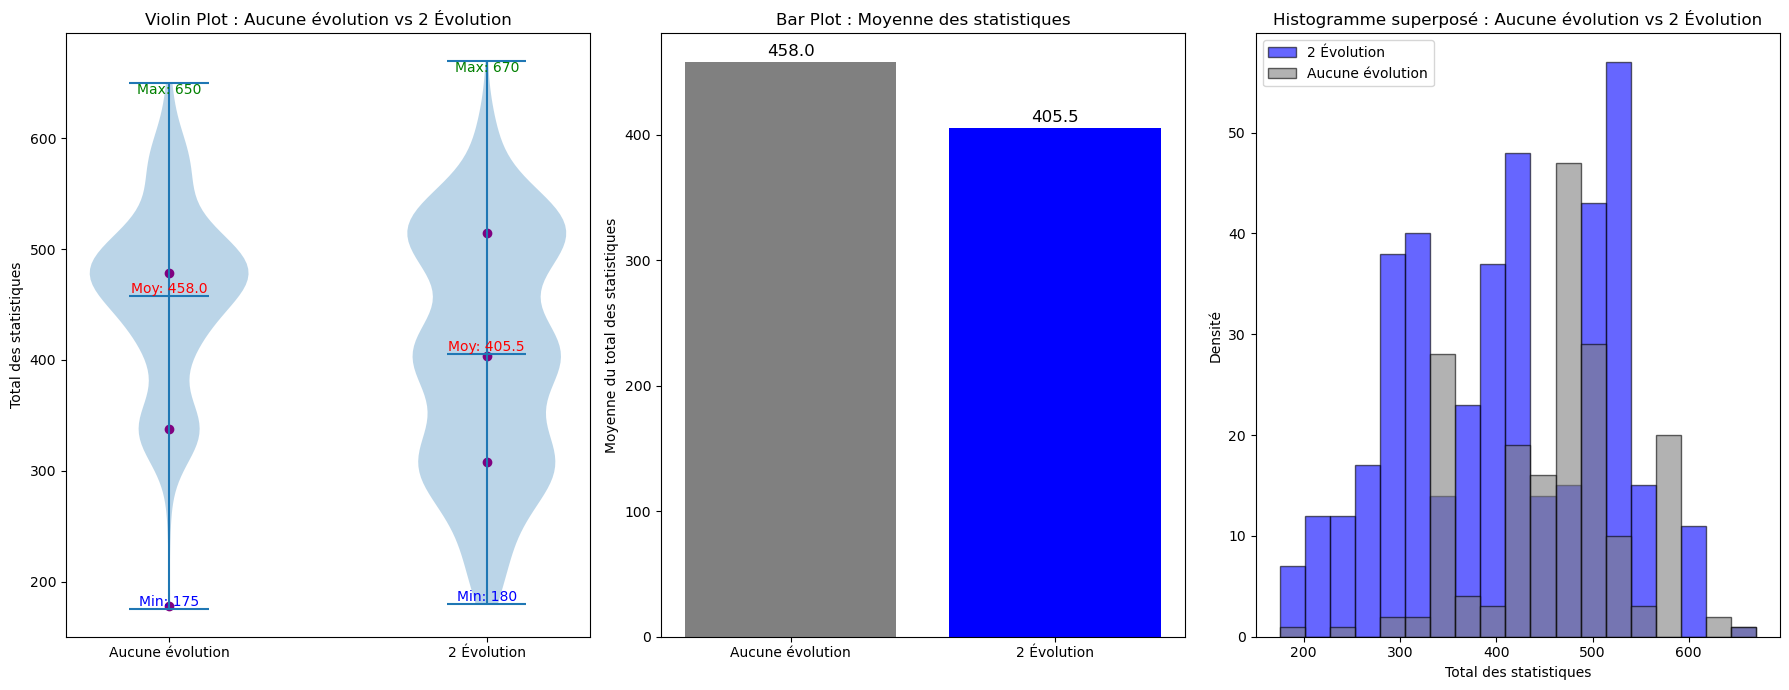

In [37]:

# Calcul des statistiques pour affichage
mean_stats = [np.mean(stats_none_evolution), np.mean(stats_two_evolution)]
min_stats = [np.min(stats_none_evolution), np.min(stats_two_evolution)]
max_stats = [np.max(stats_none_evolution), np.max(stats_two_evolution)]

# Fonction pour trouver les pics (modes)
def find_peaks(data):
    kde = gaussian_kde(data)  # Densité de probabilité
    x_vals = np.linspace(min(data), max(data), 1000)
    y_vals = kde(x_vals)

    peak_indices = np.where((y_vals[1:-1] > y_vals[:-2]) & (y_vals[1:-1] > y_vals[2:]))[0] + 1
    peaks = x_vals[peak_indices]

    return peaks

peaks_none_evolution = find_peaks(stats_none_evolution)

# Création du graphique
fig, ax = plt.subplots(1, 3, figsize=(18, 7))

# 1. Violin Plot avec stats et pics
parts = ax[0].violinplot([stats_none_evolution, stats_two_evolution], showmeans=True, showextrema=True)

# Ajouter les valeurs min, max et moyennes
for i, (mean, min_val, max_val, peaks) in enumerate(zip(mean_stats, min_stats, max_stats, [peaks_none_evolution, peaks_two_evolution]), start=1):
    ax[0].text(i, mean, f'Moy: {mean:.1f}', ha='center', va='bottom', fontsize=10, color='red')
    ax[0].text(i, min_val, f'Min: {min_val}', ha='center', va='bottom', fontsize=10, color='blue')
    ax[0].text(i, max_val, f'Max: {max_val}', ha='center', va='top', fontsize=10, color='green')

    # Ajouter les pics (modes)
    for peak in peaks:
        ax[0].scatter(i, peak, color='purple', marker='o', label='Pic' if i == 1 else "")

ax[0].set_xticks([1, 2])
ax[0].set_xticklabels(["Aucune évolution", "2 Évolution"])
ax[0].set_title("Violin Plot : Aucune évolution vs 2 Évolution")
ax[0].set_ylabel("Total des statistiques")

# 2. Bar Plot avec affichage des valeurs précises
bars = ax[1].bar(["Aucune évolution", "2 Évolution"], mean_stats, color=['grey', 'blue'])

# Ajouter les valeurs des moyenes sur les barres
for bar, value in zip(bars, mean_stats):
    ax[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, f'{value:.1f}', ha='center', fontsize=12)

ax[1].set_title("Bar Plot : Moyenne des statistiques")
ax[1].set_ylabel("Moyenne du total des statistiques")

# 3. Histogramme superposé
bins = np.linspace(min(min(stats_two_evolution), min(stats_none_evolution)),
                   max(max(stats_two_evolution), max(stats_none_evolution)), 20)

ax[2].hist(stats_two_evolution, bins=bins, color='blue', alpha=0.6, label="2 Évolution", edgecolor='black')
ax[2].hist(stats_none_evolution, bins=bins, color='grey', alpha=0.6, label="Aucune évolution", edgecolor='black')

ax[2].set_title("Histogramme superposé : Aucune évolution vs 2 Évolution")
ax[2].set_xlabel("Total des statistiques")
ax[2].set_ylabel("Densité")
ax[2].legend()

# Affichage du graphique
plt.tight_layout()
plt.show()


### Intérêt du graphique et Analyse ###

Ici on compare les extrêmes : Pokémons sans évolution et ceux avec deux évolutions.

- **Violin Plot** : La plus grande réparition des Pokémons à deux évolution en termes de total de statistiques crée une moyenne plus basse que celle des Pokémons sans évolution, malgré un pic plus haut que celui des Pokémons sans évolution (458 points) à 510 points.
- **Bar Plot** : Les moyennes des statistiques montrent que les Pokémons sans évolution dépassent les Pokémons avec deux évolution, avec une solide différence de 53 points.
- **Histogramme** : On observe deux distributions bien distinctes, les Pokémons à deux évolution sont très répartis, entre 150 et 600, là où les Pokémons sans évolution sont groupés à 350, 480 et 580 points. Cela montre que malgré la moyenne des statistiques des Pokémons sans évolution plus haute, certains Pokémons à deux évolution sont supérieur. 

# Conclusion de l'analyse

À travers l’analyse des statistiques des Pokémon selon leur statut (légendaire ou non) et leur nombre d’évolutions, nous pouvons tirer plusieurs constats :

- Les Pokémons légendaires/fabuleux possèdent des statistiques de base nettement supérieures aux Pokémons normaux. Leur moyenne est à 602 points, contre 415 pour les autres. Ils doivent donc être étudiés séparément, afin de ne pas fausser les comparaisons.

- Comme attendu pour les Pokémons légendaires, les résultats obtenus sont qu'ils ont beaucoup plus de statistiques que les Pokémons à évolution, avec quand même quelques petites exceptions. Ils peuvent donc être des atouts de taille dans le rush, cependant leur puissance vient avec une très grande difficulté de capture et il n'est possible d'en capturer qu'après la league Pokémon pour la plupart, généralement il n'y en a qu'un seul qui est disponible avant la league Pokémon. Le choix d'un Pokémon légendaire est donc le meilleur mais aussi le plus demandant en termes de conditions.

- Concernant les Pokémons non légendaires, les résultats obtenus vont à l’encontre des attentes classiques :

   Les Pokémons sans évolution ont, en moyenne, des statistiques nettement plus élevées que ceux qui possèdent une ou deux évolutions, autrement dit, les Pokémons à évolution représente un investissement, alors que les Pokémons sans évolution représente une valeur sure dès l'obtention.

❓ Cette observation peut s'expliquer par le fait que ces Pokémons sans évolution sont souvent conçus pour être directement viables en l'état (ex : Pokémons obtenus tardivement, ou formes uniques).
À l’inverse, les Pokémons évolutifs ont une progression plus étalée ou unique.



**Réponse à la problématique** :  
Non, il n'existe pas une différence notable de statistiques selon le nombre d’évolutions. L’évolution ne semble pas déterminant en termes de statistiques dans la puissance globale d’un Pokémon, voir l'inverse. Visible par le fait que les Pokémons sans évolution possédent plus de statistiques que les Pokémons évoluant. En se basant donc seulement sur les statistiques, les Pokémons sans évolution semble être les plus intéressants pour constituer une équipe pour un rush, avec un voir deux Pokémons à évolution bien choisi.

# De quoi approfondir le sujet 


L'analyse a montré que les statistiques jouent en la défaveur des Pokémons à évolution. Voici une théorie formulée par nos soins pour en trouver la raison : 

- Définition talents dans Pokémon : les talents sont des capacités innés aux Pokémons qui peuvent s'améliorer grâce aux évolutions.

- Définition moovesets dans Pokémon : les moovesets (combinaison d'attaques limités à 4) puissants sont accessibles aux Pokémons dans leur forme finale (dernière évolution ou aucune évolution et haut niveau).

- Définition synergies dans Pokémon : les synergies sont des combinaison avantageuses de moovesets puissants et de talents puissants qui marchent souvent sous des conditions précises.

- Les moovesets des Pokémon évolués pourraient leur permettre de créer un environnement où leur talent révèle tout son potentiel.

Les Pokémons à évolution pourraient donc gagner des synergies à la place des statistiques afin de compenser la différence de statistiques.

Afin de tester cette théorie il faudrait avoir accès à des données qui donne une valeur compétitive aux synergies de tout les Pokémons. Cela permettrait de voir si les Pokémons à évolution représentent un bon investissement long terme ou un trop lourd fardeau pour le rush.